# Multiple-Qubit Tomography

## Theory 

Most of the theory below follows logically as an extension from the theory for a single qubit.

For $n$ multiple-qubit states the general expression for their density matrices can be written uniquely as:
$$\hat{\rho} = \frac{1}{2^n} \sum_{i_1, i_2,...i_n=0}^{3} S_{i_1, i_2,...i_n} \hat{\sigma}_{i_1} \otimes \hat{\sigma}_{i_2} \otimes ... \otimes \hat{\sigma}_{i_n}. \tag{1}$$
Where the $S_{i_1, i_2,...i_n}$ are the values given by:
$$S_{i_1, i_2,...i_n} = Tr\{(\hat{\sigma}_{i_1} \otimes \hat{\sigma}_{i_2} \otimes ... \otimes \hat{\sigma}_{i_n})\hat{\rho}\}. \tag{2}$$

## Example

numpy.kron

Measure multiple qubits (page 123 equation 4.36)

In [1]:
import numpy as np

pauliI = [[ 1, 0],
          [ 0, 1]]

pauliX = [[ 0, 1],
          [ 1, 0]]

pauliY = [[ 0,-1j],
          [1j, 0]]

pauliZ = [[ 1, 0],
          [ 0,-1]]


Prepare a multiple-qubit state using the prepare_state gate available in qiskit.

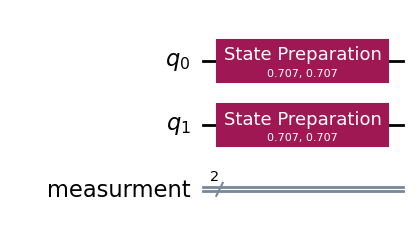

In [18]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import *

# Instantiate quantum and classical registers each of 1 bit.
qr = QuantumRegister (2, 'q')
cr = ClassicalRegister(2, 'measurment')

# Create a quantum circuit and add the prepare_state function acting on qubit 0.
qc = QuantumCircuit(qr, cr)
qc.prepare_state(state = [1/np.sqrt(2), 1/np.sqrt(2)], qubits = 0)
qc.prepare_state(state = [1/np.sqrt(2), 1/np.sqrt(2)], qubits = 1) 

# Draw the ciruit in mpl (matplotlib).
qc.draw("mpl")

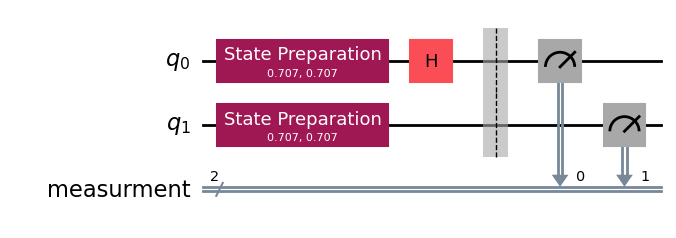

In [23]:
xMeasure = QuantumCircuit(2,2)
xMeasure.append(HGate(), [0])
xMeasure.measure_all(add_bits = False)

yMeasure = QuantumCircuit(1,1)
yMeasure.append(SdgGate(), [0])
yMeasure.append(HGate(), [0])
yMeasure.measure_all(add_bits = False)

zMeasure = QuantumCircuit(1,1)
zMeasure.measure_all(add_bits = False)

basis = [xMeasure, yMeasure, zMeasure]


qc2 = qc.compose(xMeasure)
qc2.draw("mpl")